In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from scipy.cluster import hierarchy
from sklearn.model_selection import cross_val_predict
import sklearn.model_selection as ms

import statsmodels.api as sm

%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
fte = pd.read_csv("data/president_primary_polls.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
fte

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,False,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,49.0
1,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,False,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Sanders,13257,Bernard Sanders,28.0
2,121424,65687,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,297.0,...,False,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,65.0
3,121424,65687,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,297.0,...,False,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Sanders,13257,Bernard Sanders,30.0
4,121367,65683,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18632,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Sanders,13257,Bernard Sanders,20.0
18633,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Booker,13287,Cory A. Booker,5.0
18634,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Harris,13288,Kamala D. Harris,5.0
18635,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Bloomberg,13289,Michael Bloomberg,5.0


In [4]:
ygPoll = fte["pollster"] == "YouGov" 


In [5]:
yg = fte[ygPoll]

In [12]:
bidenBool = fte["candidate_name"] == "Joseph R. Biden Jr."
biden = fte[bidenBool]

In [13]:
biden

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name
0,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,49.0,Joseph R. Biden Jr.
2,121424,65687,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,297.0,...,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,65.0,Joseph R. Biden Jr.
4,121367,65683,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,61.0,Joseph R. Biden Jr.
6,121362,65680,2020,NaN,228,IBD/TIPP,NaN,NaN,IBD/TIPP,144.0,...,4/6/20 16:49,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,62.0,Joseph R. Biden Jr.
8,120693,65045,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,4/1/20 09:27,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18560,92395,57007,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,133.0,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,25.0,Joseph R. Biden Jr.
18568,92396,57007,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,133.0,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0,Joseph R. Biden Jr.
18608,92394,57181,2020,Massachusetts,568,YouGov,278,UMass Amherst,YouGov,391.0,...,12/27/18 03:58,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0,Joseph R. Biden Jr.
18610,92393,56853,2020,NaN,1189,Morning Consult,538,Politico,Morning Consult,218.0,...,12/27/18 03:57,NaN,https://www.politico.com/f/?id=00000167-0956-d...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,26.0,Joseph R. Biden Jr.


In [24]:
pollsterDict = dict()
timestamps = list()
for index, row in biden.iterrows():
    if(row["pollster"] not in pollsterDict):
        pollsterDict[row["pollster"]] = [{pd.to_datetime(row["start_date"]):row["pct"]}]
    else:
        pollsterDict[row["pollster"]].append({pd.to_datetime(row["start_date"]):row["pct"]})
    timestamps.append(pd.to_datetime(row["start_date"]))

In [22]:
pollsterDict["YouGov"]

[{Timestamp('2020-04-05 00:00:00'): 49.0},
 {Timestamp('2020-03-29 00:00:00'): 47.0},
 {Timestamp('2020-03-22 00:00:00'): 47.0},
 {Timestamp('2020-03-15 00:00:00'): 48.0},
 {Timestamp('2020-03-08 00:00:00'): 53.0},
 {Timestamp('2020-03-06 00:00:00'): 54.0},
 {Timestamp('2020-03-06 00:00:00'): 59.0},
 {Timestamp('2020-03-06 00:00:00'): 49.0},
 {Timestamp('2020-03-01 00:00:00'): 28.0},
 {Timestamp('2020-02-27 00:00:00'): 19.0},
 {Timestamp('2020-02-27 00:00:00'): 26.0},
 {Timestamp('2020-02-26 00:00:00'): 19.0},
 {Timestamp('2020-02-26 00:00:00'): 21.0},
 {Timestamp('2020-02-23 00:00:00'): 20.0},
 {Timestamp('2020-02-18 00:00:00'): 12.0},
 {Timestamp('2020-02-20 00:00:00'): 28.0},
 {Timestamp('2020-02-20 00:00:00'): 17.0},
 {Timestamp('2020-02-11 00:00:00'): 20.0},
 {Timestamp('2020-02-11 00:00:00'): 16.0},
 {Timestamp('2020-02-11 00:00:00'): 12.9},
 {Timestamp('2020-02-16 00:00:00'): 18.0},
 {Timestamp('2020-02-06 00:00:00'): 20.4},
 {Timestamp('2020-02-01 00:00:00'): 21.4},
 {Timestamp

In [32]:
biden.insert(2, "startDateTs", timestamps, True)

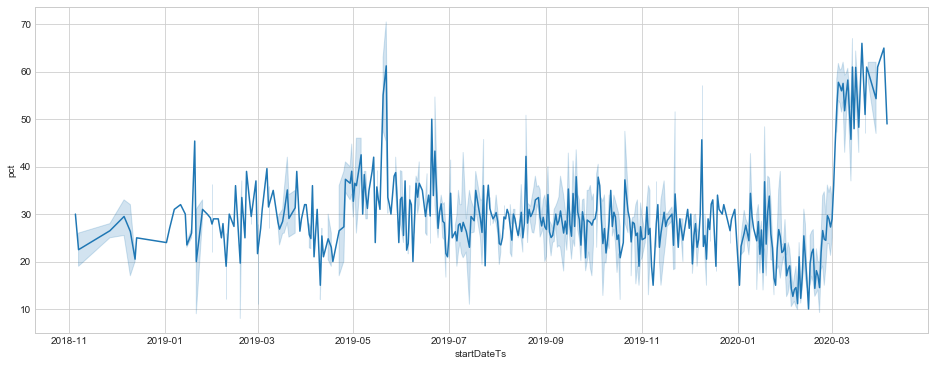

In [37]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=biden["startDateTs"], y=biden["pct"], data=biden)

In [34]:
biden["startDateTs"]

0       2020-04-05
2       2020-04-03
4       2020-03-30
6       2020-03-29
8       2020-03-29
           ...    
18560   2018-11-27
18568   2018-11-27
18608   2018-11-07
18610   2018-11-07
18631   2018-11-05
Name: startDateTs, Length: 1267, dtype: datetime64[ns]

In [38]:
biden.pollster.unique()

array(['YouGov', 'SSRS', 'Morning Consult', 'IBD/TIPP',
       'Harris Insights & Analytics', 'Marquette University Law School',
       'ABC News/Washington Post', 'Echelon Insights', 'Ipsos',
       'Lord Ashcroft Polls', 'Emerson College', 'Swayable', 'AtlasIntel',
       'Marist College', 'Monmouth University', 'University of Georgia',
       'Point Blank Political', 'NBC News/Wall Street Journal',
       'Gravis Marketing', 'Latino Decisions', 'ROI Rocket',
       'Hofstra University', 'Sacred Heart University',
       'Public Policy Polling', 'University of North Florida',
       'Chism Strategies', 'Data for Progress', 'Optimus',
       'Victory Research', 'Mitchell Research & Communications',
       'Ogden & Fry', 'Target Insyght', 'Concord Public Opinion Partners',
       'St. Pete Polls', 'Quinnipiac University',
       'Florida Atlantic University', 'SurveyUSA', 'EPIC-MRA',
       'Remington Research Group', 'OH Predictive Insights/MBQF',
       'Change Research', 'Spry Strat

In [39]:
bidenYouGov = biden[biden["pollster"] == "YouGov"]

In [40]:
timestamps = list()
for index, row in bidenYouGov.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))

In [45]:
bidenYouGov.insert(2, "start_DateTs", timestamps, True)

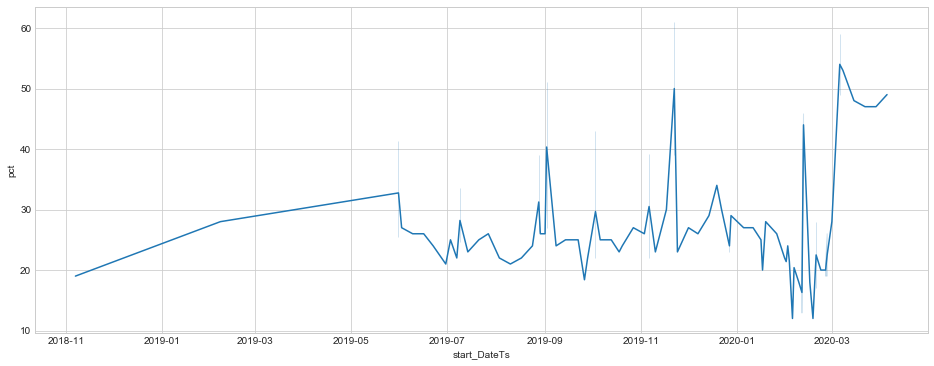

In [46]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=bidenYouGov["start_DateTs"], y=bidenYouGov["pct"], data=bidenYouGov)

In [47]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenSurveyUSA = biden[biden["pollster"] == "SurveyUSA"]

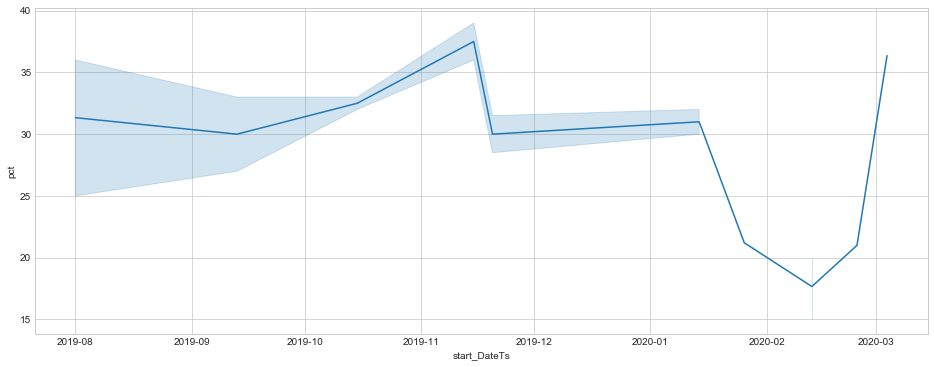

In [50]:
timestamps = list()
for index, row in bidenSurveyUSA.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenSurveyUSA.insert(2, "start_DateTs", timestamps, True)
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=bidenSurveyUSA["start_DateTs"], y=bidenSurveyUSA["pct"], data=bidenSurveyUSA)

In [52]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenMonmouth = biden[biden["pollster"] == "Monmouth University"]
timestamps = list()
for index, row in bidenMonmouth.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenMonmouth.insert(2, "start_DateTs", timestamps, True)

In [59]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenABC = biden[biden["pollster"] == "ABC News/Washington Post"]
timestamps = list()
for index, row in bidenABC.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenABC.insert(2, "start_DateTs", timestamps, True)

In [ ]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenABC = biden[biden["pollster"] == "ABC News/Washington Post"]
timestamps = list()
for index, row in bidenABC.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenABC.insert(2, "start_DateTs", timestamps, True)

In [64]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenSeltzer = biden[biden["pollster"] == "Selzer & Co."]
timestamps = list()
for index, row in bidenSeltzer.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenSeltzer.insert(2, "start_DateTs", timestamps, True)

In [102]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenMuhlenberg = biden[biden["pollster"] == "Emerson College"]
timestamps = list()
for index, row in bidenMuhlenberg.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenMuhlenberg.insert(2, "start_DateTs", timestamps, True)

In [109]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenSuffolk = biden[biden["pollster"] == "Suffolk University"]
timestamps = list()
for index, row in bidenSuffolk.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenSuffolk.insert(2, "start_DateTs", timestamps, True)

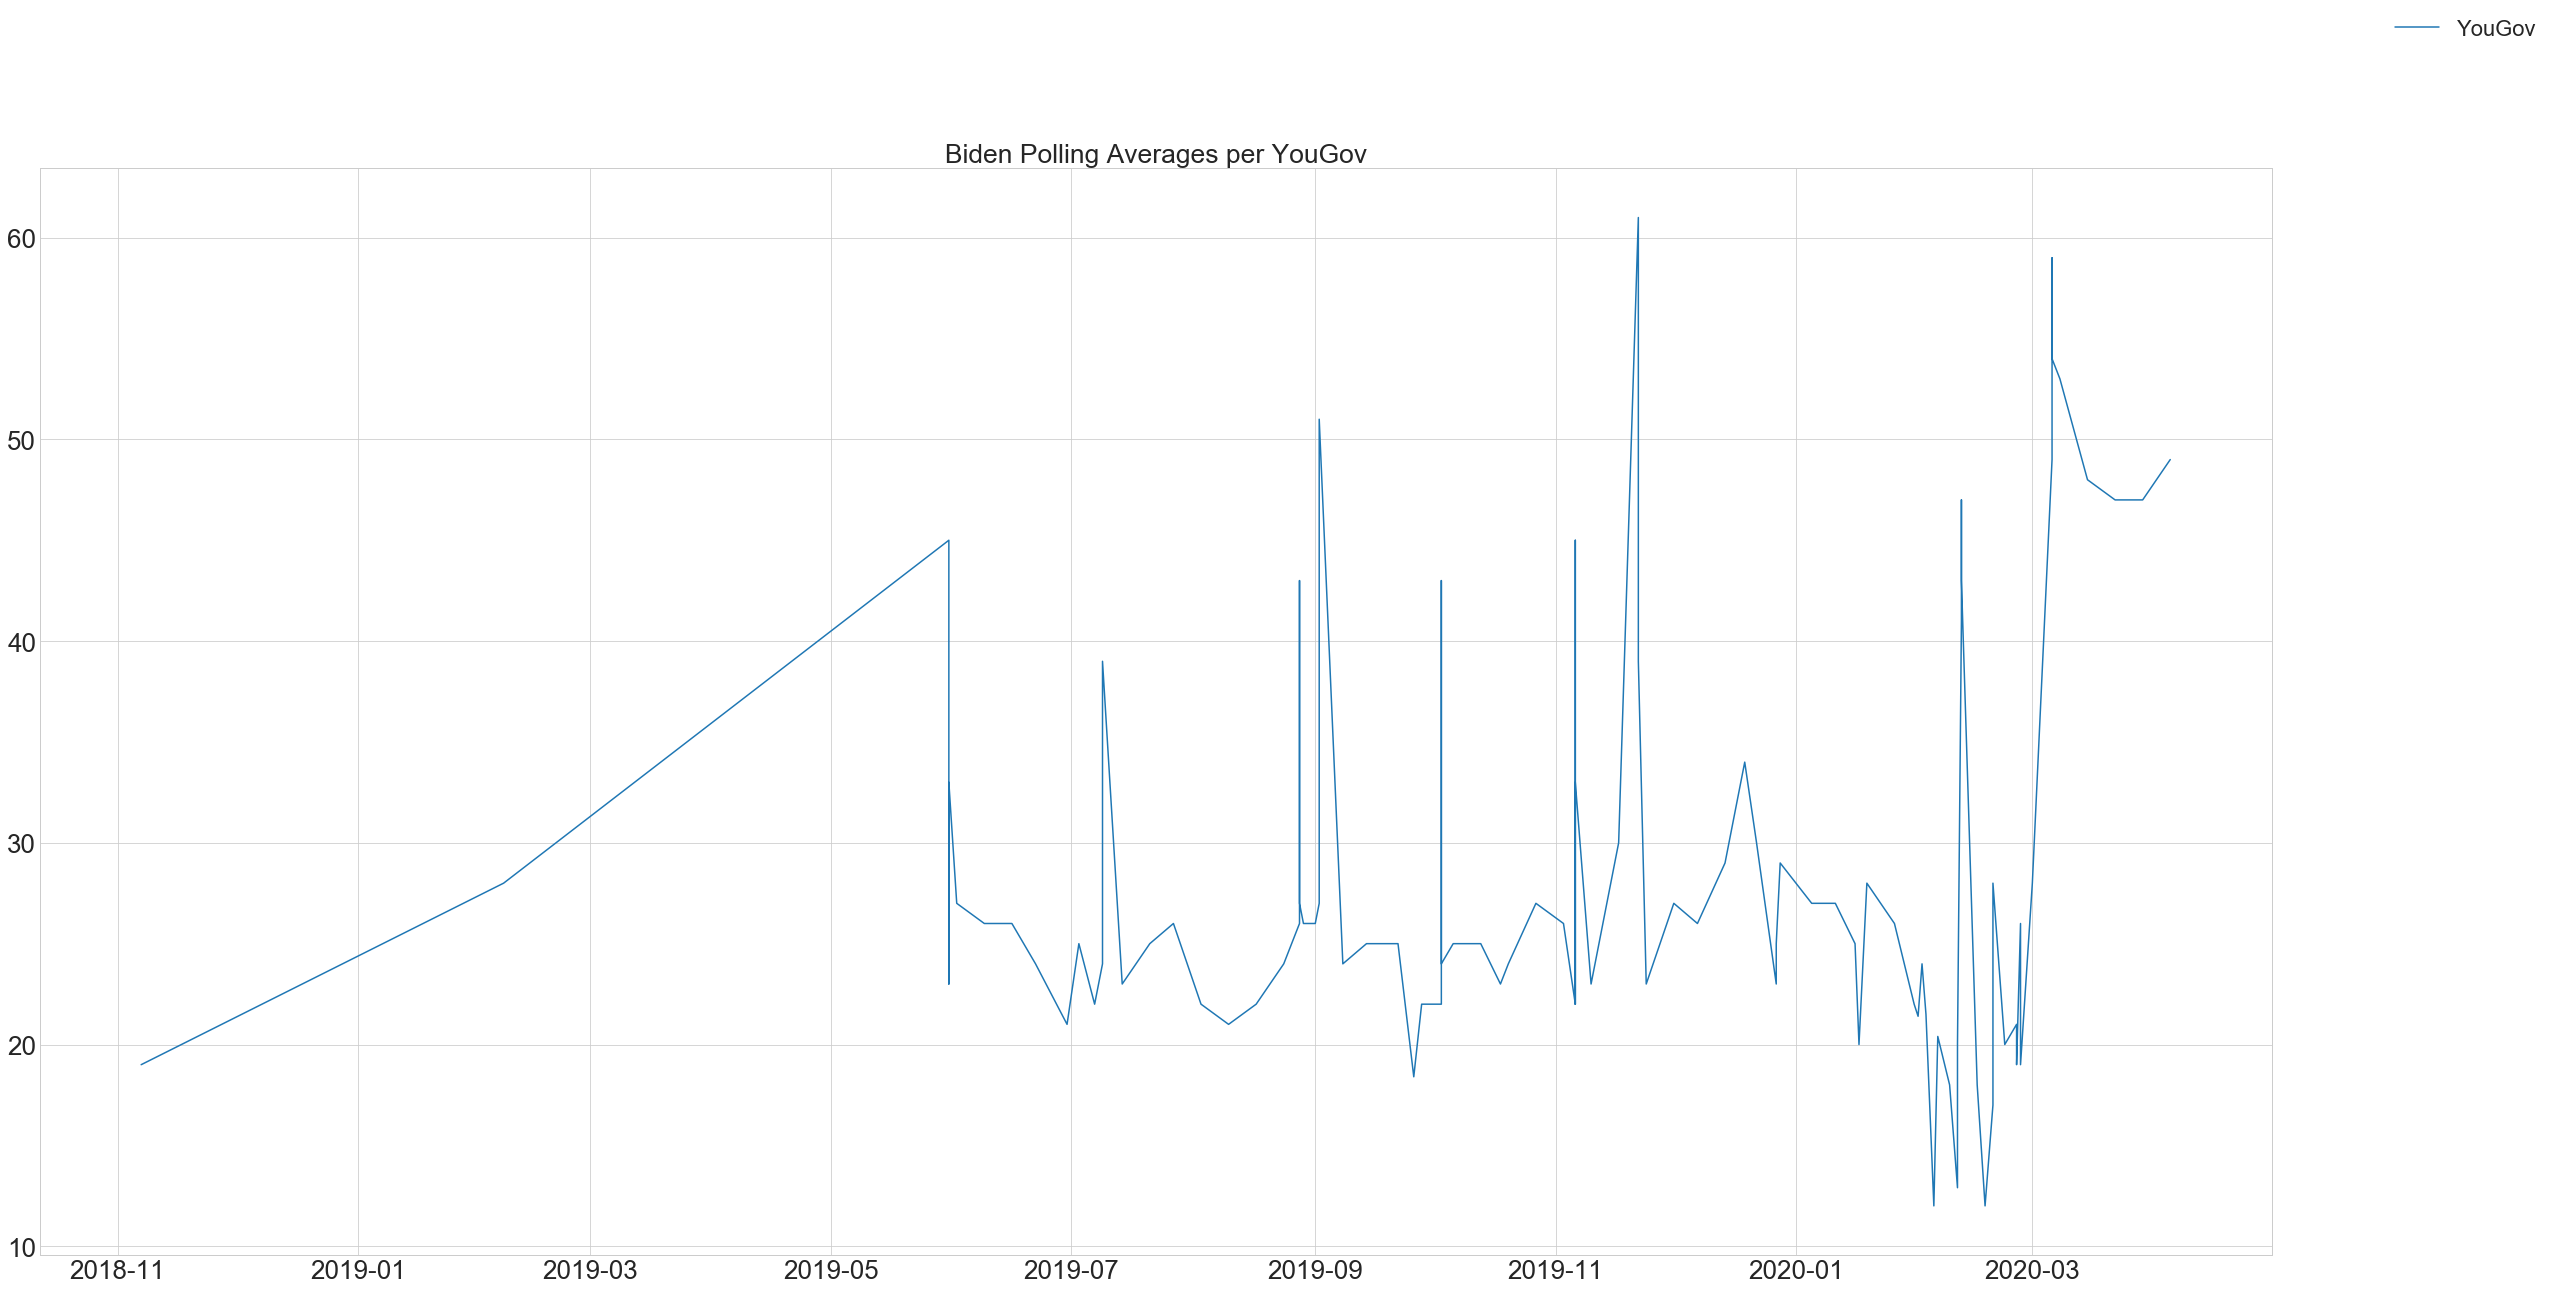

In [132]:
fig = plt.figure()
plt.rcParams.update({'font.size': 26})
plt.plot(bidenYouGov["start_DateTs"], bidenYouGov["pct"])
#plt.plot(bidenSurveyUSA["start_DateTs"], bidenSurveyUSA["pct"])
#plt.plot(bidenMonmouth["start_DateTs"], bidenMonmouth["pct"])
#plt.plot(bidenABC["start_DateTs"], bidenABC["pct"])
#plt.plot(bidenSeltzer["start_DateTs"], bidenSeltzer["pct"])
#plt.plot(bidenMuhlenberg["start_DateTs"], bidenMuhlenberg["pct"])
#plt.plot(bidenSuffolk["start_DateTs"], bidenSuffolk["pct"])
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})
fig.legend([ "YouGov","SurveyUSA", "Monmouth University", "ABC News/Washington Post", "Selzer & Co.", "Muhlenberg College", "Suffolk University"])
plt.title("Biden Polling Averages per YouGov")
plt.show()

In [123]:
bidenYouGov = bidenYouGov.sort_values("start_DateTs", ascending = True)

In [125]:
bidenYouGov

,question_id,poll_id,start_DateTs,start_DateTsioi,startDateTssdf,startDateTsbad,start_date_tsbad,cycle,state,pollster_id,...,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name,start_date_ts
18608,92394,57181,2018-11-07,2018-11-07,2018-11-07,2018-11-07,2018-11-07,2020,Massachusetts,568,...,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0,Joseph R. Biden Jr.,2018-11-07
17866,93245,57557,2019-02-07,2019-02-07,2019-02-07,2019-02-07,2019-02-07,2020,New Hampshire,568,...,NaN,https://www.umass.edu/newsoffice/article/presi...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0,Joseph R. Biden Jr.,2019-02-07
14669,98020,58470,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,South Carolina,568,...,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVN...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,45.0,Joseph R. Biden Jr.,2019-05-31
14621,98018,58468,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,Iowa,568,...,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVS...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,30.0,Joseph R. Biden Jr.,2019-05-31
14877,98023,58471,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,Texas,568,...,NaN,https://www.texastribune.org/2019/06/17/trump-...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,23.0,Joseph R. Biden Jr.,2019-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,119899,64794,2020-03-08,2020-03-08,2020-03-08,2020-03-08,2020-03-08,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/vrbl9mmctz/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,53.0,Joseph R. Biden Jr.,2020-03-08
42,120147,64872,2020-03-15,2020-03-15,2020-03-15,2020-03-15,2020-03-15,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/fcdckgt368/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,48.0,Joseph R. Biden Jr.,2020-03-15
22,120488,64980,2020-03-22,2020-03-22,2020-03-22,2020-03-22,2020-03-22,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/bfiid7tfh3/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.,2020-03-22
8,120693,65045,2020-03-29,2020-03-29,2020-03-29,2020-03-29,2020-03-29,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.,2020-03-29


### Removing outliers from YouGov data

In [133]:
bidenYouGov

,question_id,poll_id,start_DateTs,start_DateTsioi,startDateTssdf,startDateTsbad,start_date_tsbad,cycle,state,pollster_id,...,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name,start_date_ts
18608,92394,57181,2018-11-07,2018-11-07,2018-11-07,2018-11-07,2018-11-07,2020,Massachusetts,568,...,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0,Joseph R. Biden Jr.,2018-11-07
17866,93245,57557,2019-02-07,2019-02-07,2019-02-07,2019-02-07,2019-02-07,2020,New Hampshire,568,...,NaN,https://www.umass.edu/newsoffice/article/presi...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0,Joseph R. Biden Jr.,2019-02-07
14669,98020,58470,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,South Carolina,568,...,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVN...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,45.0,Joseph R. Biden Jr.,2019-05-31
14621,98018,58468,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,Iowa,568,...,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVS...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,30.0,Joseph R. Biden Jr.,2019-05-31
14877,98023,58471,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,Texas,568,...,NaN,https://www.texastribune.org/2019/06/17/trump-...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,23.0,Joseph R. Biden Jr.,2019-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,119899,64794,2020-03-08,2020-03-08,2020-03-08,2020-03-08,2020-03-08,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/vrbl9mmctz/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,53.0,Joseph R. Biden Jr.,2020-03-08
42,120147,64872,2020-03-15,2020-03-15,2020-03-15,2020-03-15,2020-03-15,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/fcdckgt368/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,48.0,Joseph R. Biden Jr.,2020-03-15
22,120488,64980,2020-03-22,2020-03-22,2020-03-22,2020-03-22,2020-03-22,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/bfiid7tfh3/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.,2020-03-22
8,120693,65045,2020-03-29,2020-03-29,2020-03-29,2020-03-29,2020-03-29,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.,2020-03-29


In [170]:
rowsToDrop = list()
changes = list()
for i in range(0, len(bidenYouGov)-1) : 
    change = abs(bidenYouGov.iloc[i+1, 37] - bidenYouGov.iloc[i, 37])
    changes.append(change)
    if(change >= 10):
        rowsToDrop.append(i)
changes.sort(reverse=True)
print(changes)
noExtremities = bidenYouGov.reset_index().drop(rowsToDrop)

[31.0, 27.0, 25.0, 23.0, 23.0, 22.0, 21.0, 21.0, 21.0, 19.0, 17.0, 16.0, 16.0, 16.0, 16.0, 15.0, 14.0, 12.0, 11.0, 11.0, 10.0, 10.0, 10.0, 9.5, 9.0, 9.0, 8.399999999999999, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.600000000000001, 6.0, 6.0, 5.1, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.6000000000000014, 3.0999999999999996, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.6000000000000014, 2.5, 2.3999999999999986, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6000000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


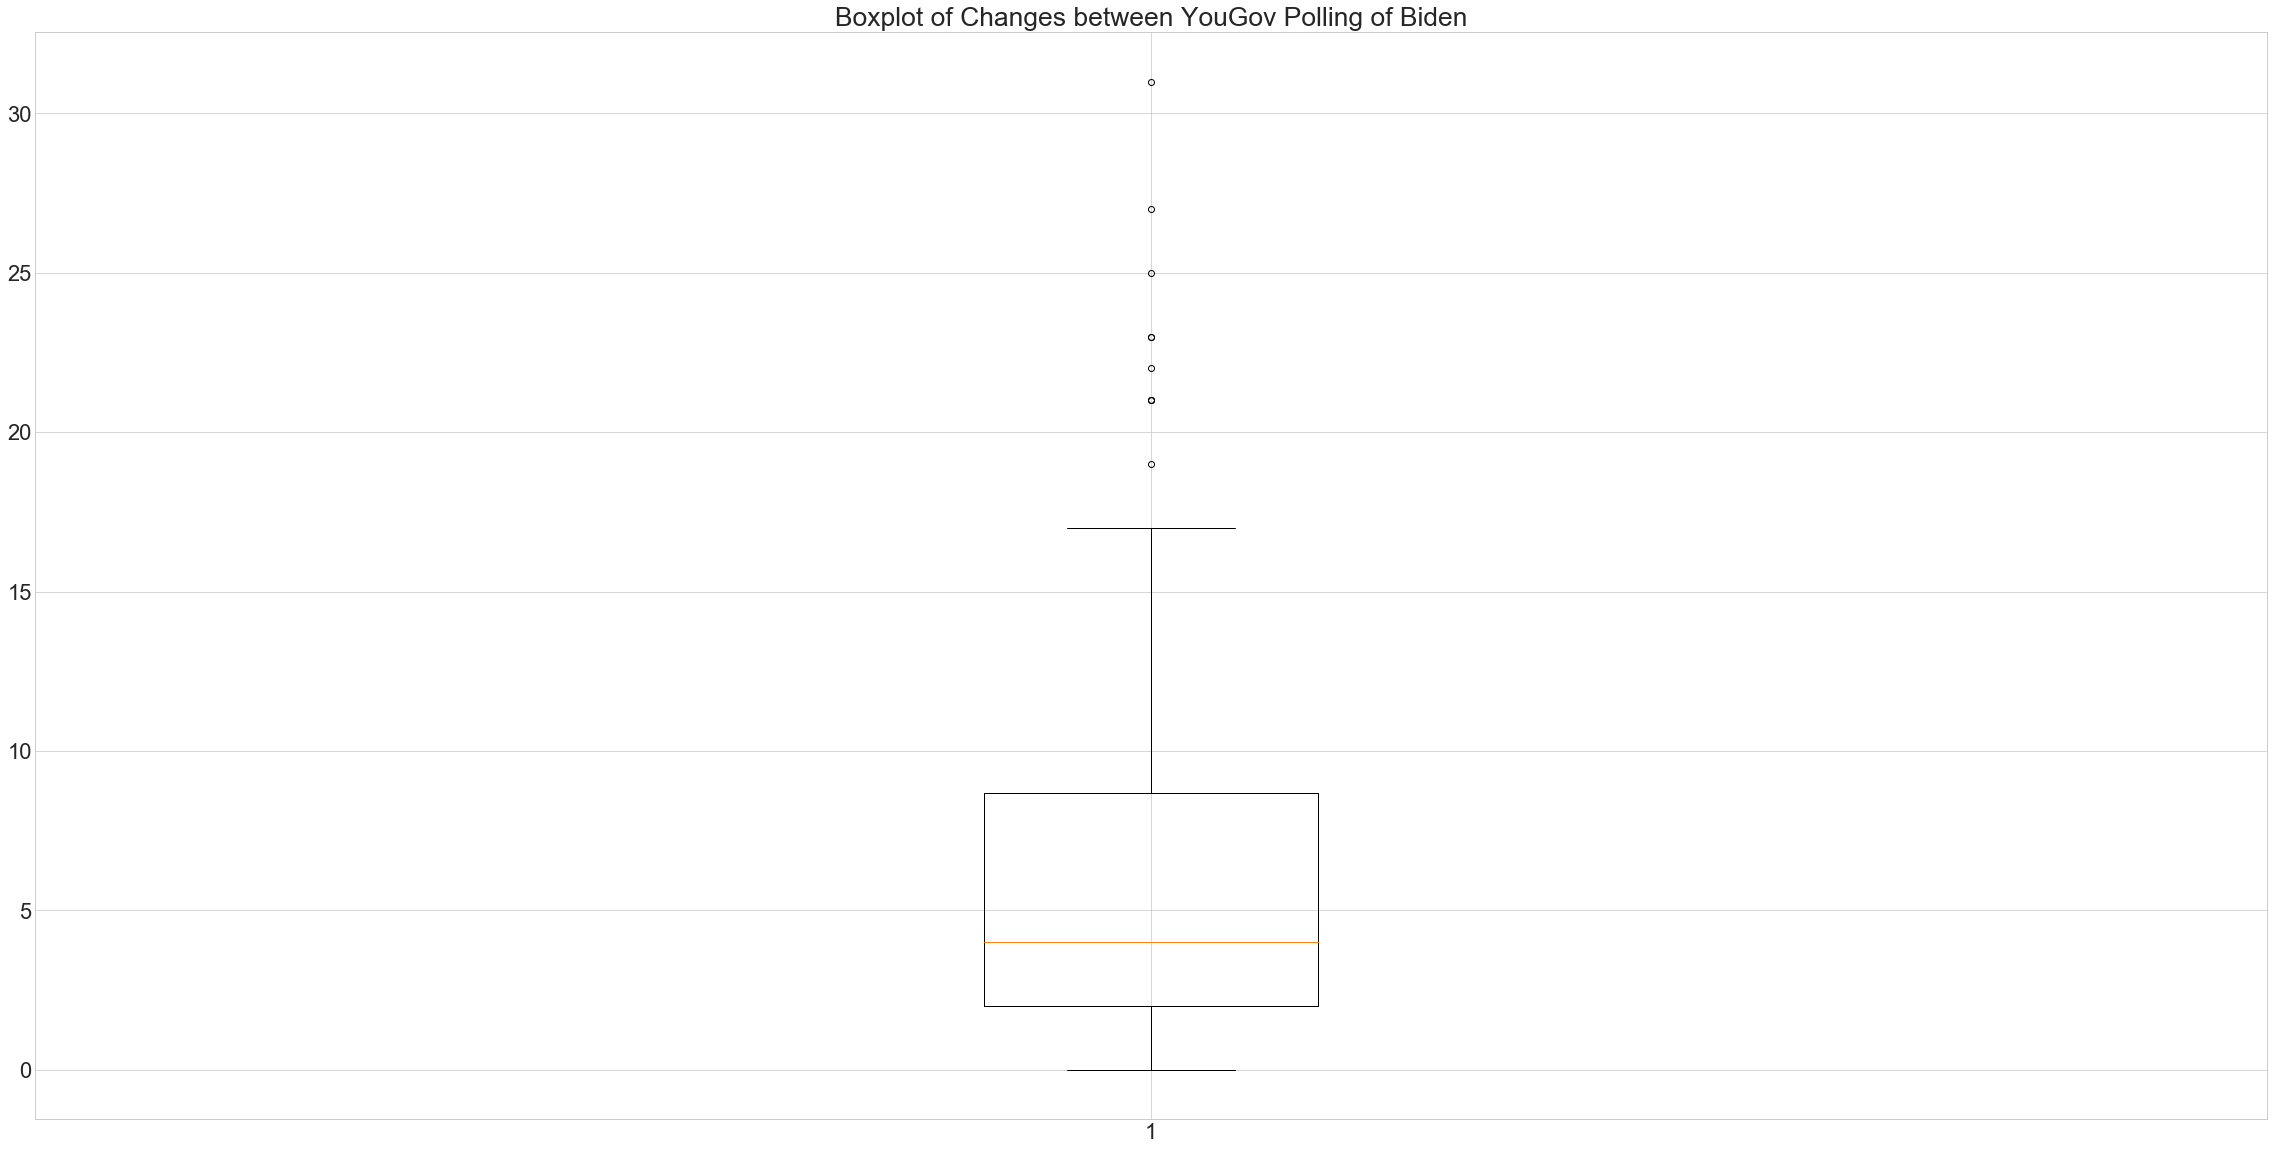

In [171]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of Changes between YouGov Polling of Biden')
ax1.boxplot(changes)
plt.show()

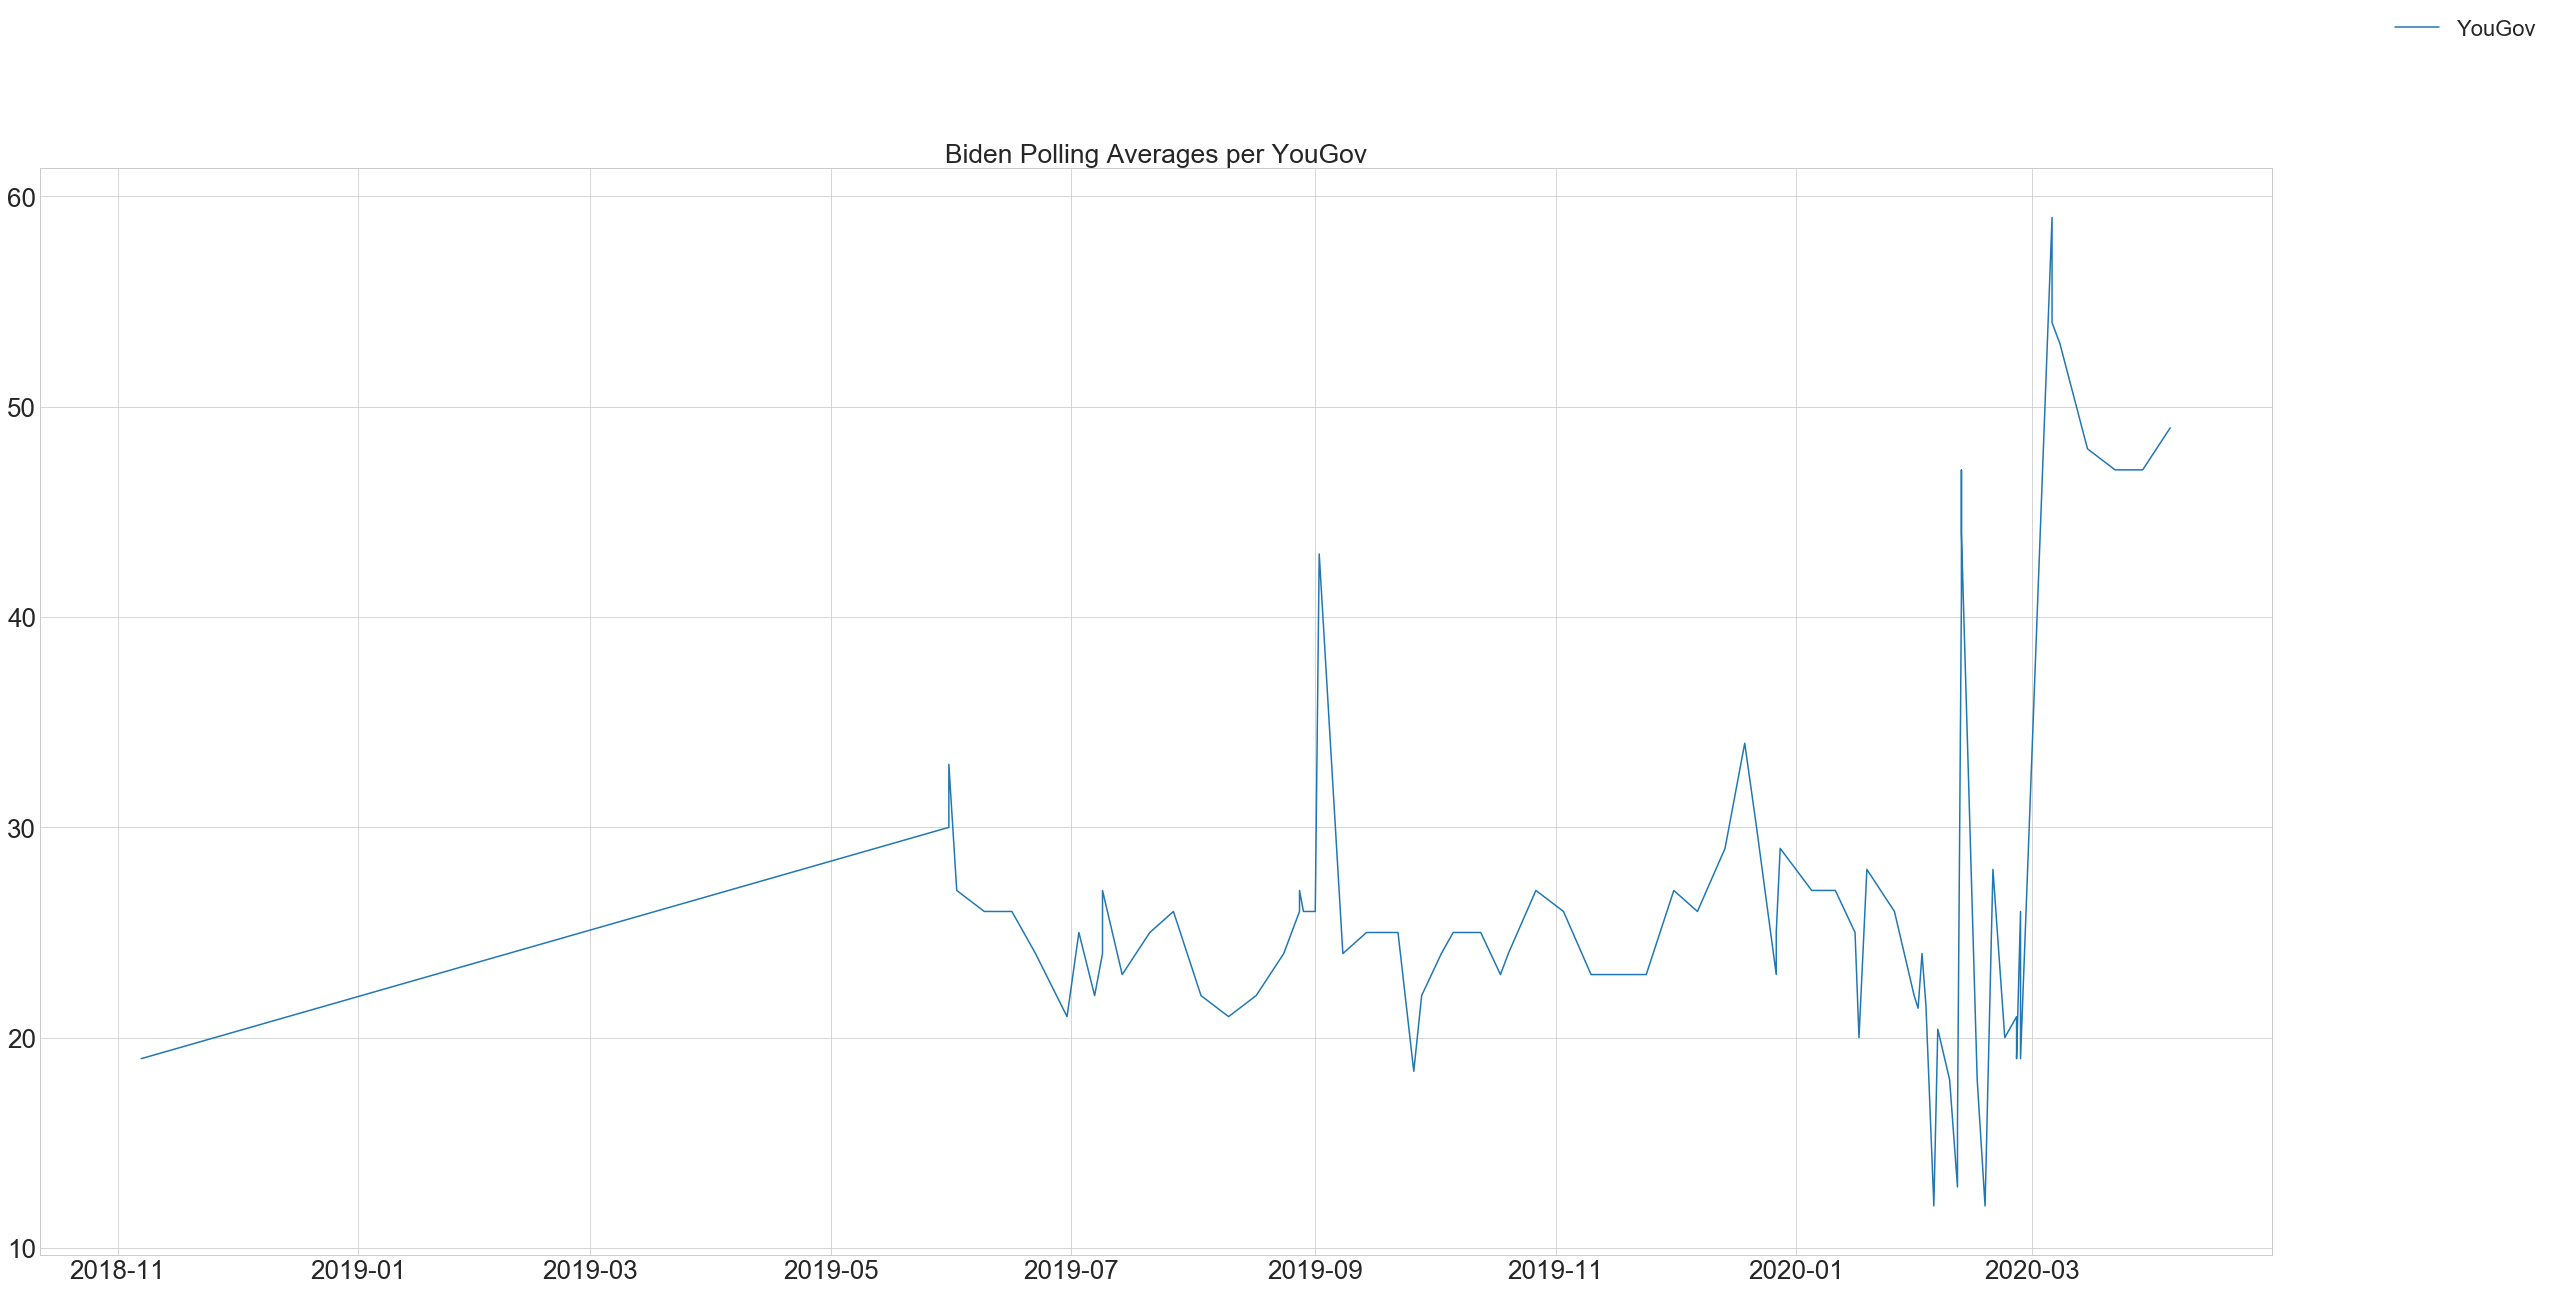

In [172]:
fig = plt.figure()
plt.rcParams.update({'font.size': 26})
plt.plot(noExtremities["start_DateTs"], noExtremities["pct"])
#plt.plot(bidenSurveyUSA["start_DateTs"], bidenSurveyUSA["pct"])
#plt.plot(bidenMonmouth["start_DateTs"], bidenMonmouth["pct"])
#plt.plot(bidenABC["start_DateTs"], bidenABC["pct"])
#plt.plot(bidenSeltzer["start_DateTs"], bidenSeltzer["pct"])
#plt.plot(bidenMuhlenberg["start_DateTs"], bidenMuhlenberg["pct"])
#plt.plot(bidenSuffolk["start_DateTs"], bidenSuffolk["pct"])
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})
fig.legend([ "YouGov","SurveyUSA", "Monmouth University", "ABC News/Washington Post", "Selzer & Co.", "Muhlenberg College", "Suffolk University"])
plt.title("Biden Polling Averages per YouGov")
plt.show()

In [145]:
noExtremities

,question_id,poll_id,start_DateTs,start_DateTsioi,startDateTssdf,startDateTsbad,start_date_tsbad,cycle,state,pollster_id,...,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name,start_date_ts
18608,92394,57181,2018-11-07,2018-11-07,2018-11-07,2018-11-07,2018-11-07,2020,Massachusetts,568,...,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0,Joseph R. Biden Jr.,2018-11-07
17866,93245,57557,2019-02-07,2019-02-07,2019-02-07,2019-02-07,2019-02-07,2020,New Hampshire,568,...,NaN,https://www.umass.edu/newsoffice/article/presi...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0,Joseph R. Biden Jr.,2019-02-07
14669,98020,58470,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,South Carolina,568,...,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVN...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,45.0,Joseph R. Biden Jr.,2019-05-31
14621,98018,58468,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,Iowa,568,...,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVS...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,30.0,Joseph R. Biden Jr.,2019-05-31
14877,98023,58471,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,Texas,568,...,NaN,https://www.texastribune.org/2019/06/17/trump-...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,23.0,Joseph R. Biden Jr.,2019-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,119899,64794,2020-03-08,2020-03-08,2020-03-08,2020-03-08,2020-03-08,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/vrbl9mmctz/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,53.0,Joseph R. Biden Jr.,2020-03-08
42,120147,64872,2020-03-15,2020-03-15,2020-03-15,2020-03-15,2020-03-15,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/fcdckgt368/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,48.0,Joseph R. Biden Jr.,2020-03-15
22,120488,64980,2020-03-22,2020-03-22,2020-03-22,2020-03-22,2020-03-22,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/bfiid7tfh3/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.,2020-03-22
8,120693,65045,2020-03-29,2020-03-29,2020-03-29,2020-03-29,2020-03-29,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.,2020-03-29
